In [15]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
validation_file='dataset/valid.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [16]:
def preprocess(data):
    # Normalization ([0, 255] => [-1, 1))
    return (data - 128.0) / 128.0

def restore_image(data):
    return data * 128.0 + 128.0


In [17]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import pandas as pd
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
df = pd.read_csv('signnames.csv')
n_classes =len( df.index)

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [18]:
from tensorflow.contrib.layers import flatten
from tensorflow.contrib import layers
import tensorflow as tf

In [19]:
#global variables/. 
EPOCHS = 30
BATCH_SIZE = 128

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
y_onehot = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)


In [21]:
def TrafficSignNet(x, keep_prob, mu = 0, sigma = 0.1 ):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    l1 = conv1
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x12
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    l2 = conv2
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    # dropout is added to the network to see the performance.


    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, l1, l2

In [22]:
import os
import matplotlib.pyplot as plt
import cv2

new_img_dir = 'sampleImages/'
image_files = sorted(os.listdir(new_img_dir))
new_img_count = len(image_files)
new_images = []
X_new, y_new = [], []

for image_name in image_files:
    # Read an image file
    img = plt.imread(new_img_dir + image_name)
    print(image_name)
    new_images.append(img)
    # Resize the image file
    
    img_resized = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_LINEAR)
    print(img_resized.shape)
    X_new.append(img_resized)
    
    # Determine the traffic sign class
    #img_class = int(image_name.split('.')[0])
    #y_new.append(img_class)
# Preprocess images
y_new = np.array(y_new)
X_new = np.array(X_new)


sample1.jpg
(32, 32, 3)
sample2.jpg
(32, 32, 3)
sample3.jpg
(32, 32, 3)
sample5.jpg
(32, 32, 3)


In [23]:
X_new.shape

(4, 32, 32, 3)

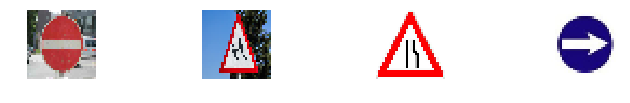

In [24]:
plt.figure(figsize=(12, 16.5))

for i in range(0, X_new.shape[0]):
    plt.subplot(11, 4, i+1)

    plt.imshow(X_new[i]) #plot first image of the class.
    #plt.title(df.values[i][1]) When I decide the title Ill use it. 
    plt.axis('off')
plt.show()

In [25]:
X_new_proc = preprocess(X_new)



In [5]:
from keras.models import Sequential
from keras.layers.core import Activation , Dropout, Dense, Flatten

In [17]:
model = Sequential()
model.add(Flatten(input_shape = (32,32,3)))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(5))

#5th Layer - Add a ReLU activation layer
model.add(Activation('softmax'))


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               307300    
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 505       
_________________________________________________________________
activation_9 (Activation)    (None, 5)                 0         
Total params: 307,805
Trainable params: 307,805
Non-trainable params: 0
_________________________________________________________________
